# Business Case: Walmart - Confidence Interval and CLT

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### 1. Defining Problem Statement and Analyzing basic metrics


In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/Dataset/walmart_data.csv"

data = pd.read_csv(path)

#### 1.1 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required)

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
data.shape

(550068, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


### 1.2. Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
# Count the values of Males and Females

data.Gender.value_counts()

# The dataset has 4,14,259 males and 1,35,809

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
# Count the values of Males and Females

data.City_Category.value_counts()

# Observation -  The dataset has 4,14,259 males and 1,35,809

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
# Count the values of years lived in the current city

yearsincity = data.Stay_In_Current_City_Years.value_counts()
yearsincity.reset_index()

# Observation -  The dataset has most users living in the current city less than

,index,Stay_In_Current_City_Years
0,1,193821
1,2,101838
2,3,95285
3,4+,84726
4,0,74398


In [ ]:
# Count the values of occupation

data.Occupation.value_counts().sort_values(ascending= False)

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
# Count the values users distributed per City categories

data.City_Category.value_counts()



B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
cat_col_perc = data[categorical_cols].melt().groupby(['variable','value'])[['value']].count()/len(data)*100

In [ ]:
cat_col_perc.rename(columns = {'value':'Percentage'}, inplace = True)
cat_col_perc

Percentage
variable                   value            
Age                        0-17     2.745479
                           18-25   18.117760
                           26-35   39.919974
                           36-45   19.999891
                           46-50    8.308246
                           51-55    6.999316
                           55+      3.909335
City_Category              A       26.854862
                           B       42.026259
                           C       31.118880
Gender                     F       24.689493
                           M       75.310507
Marital_Status             0       59.034701
                           1       40.965299
Occupation                 0       12.659889
                           1        8.621843
                           2        4.833584
                           3        3.208694
                           4       13.145284
                           5        2.213726
                           6        3.700452
                           7       10.750125
                           8        0.281056
                           9        1.143677
                           10       2.350618
                           11       2.106285
                           12       5.668208
                           13       1.404917
                           14       4.964659
                           15       2.211545
                           16       4.612339
                           17       7.279645
                           18       1.203851
                           19       1.538173
                           20       6.101427
Product_Category           1       25.520118
                           2        4.338373
                           3        3.674637
                           4        2.136645
                           5       27.438971
                           6        3.720631
                           7        0.676462
                           8       20.711076
                           9        0.074536
                           10       0.931703
                           11       4.415272
                           12       0.717548
                           13       1.008784
                           14       0.276875
                           15       1.143495
                           16       1.786688
                           17       0.105078
                           18       0.568112
                           19       0.291419
                           20       0.463579
Stay_In_Current_City_Years 0       13.525237
                           1       35.235825
                           2       18.513711
                           3       17.322404
                           4+      15.402823

Observations -

1. Around 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
2. 75% of the users are Male and 25% are Female
3. 60% Single, 40% Married
4. 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
5. Total of 20 product categories are there
6. There are 20 different types of occupations in the city

### 1.3 Visual Analysis - Univariate & Bivariate

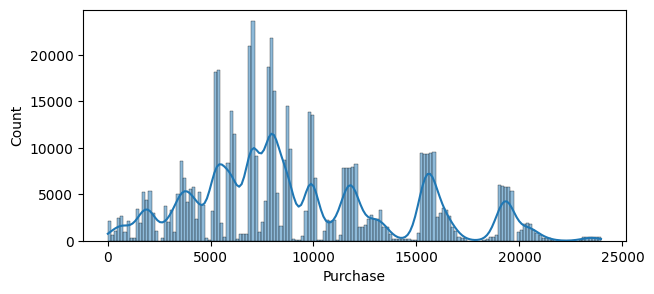

In [ ]:
plt.figure(figsize=(7, 3))
sns.histplot(data=data, x='Purchase', kde=True)
plt.show()

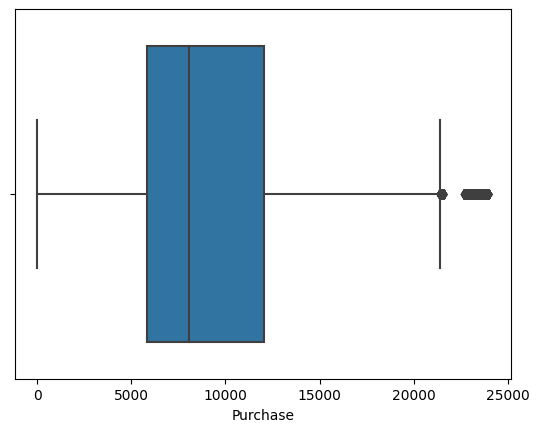

In [ ]:
sns.boxplot(data=data, x='Purchase', orient='h')
plt.show()

Observations:

1. Purchase amount has outliers i.e., above 20,000
2. The purchase amount is more in range in of 5,000 to 10,000.


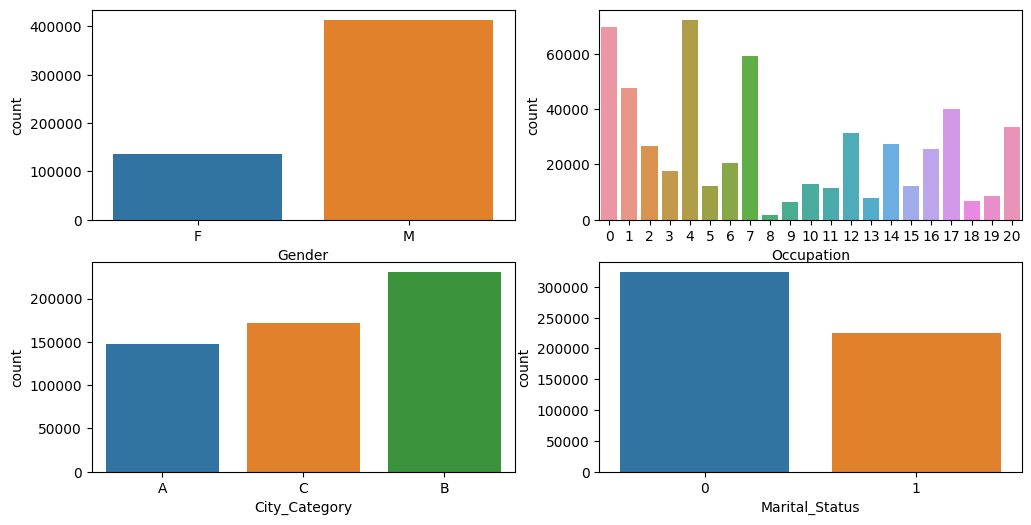

In [ ]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
sns.countplot(data=data, x='Gender', ax=axs[0,0])
sns.countplot(data=data, x='Occupation', ax=axs[0,1])
sns.countplot(data=data, x='City_Category', ax=axs[1,0])
sns.countplot(data=data, x='Marital_Status', ax=axs[1,1])
plt.show()

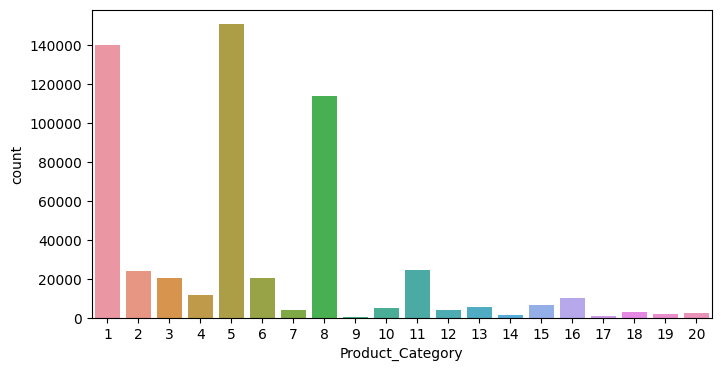

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Product_Category')
plt.show()

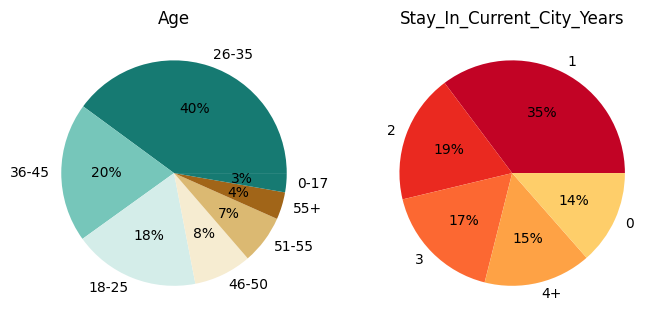

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

df = data['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=df.values, labels=df.index, autopct='%.0f%%',
colors=palette_color)
axs[0].set_title("Age")
df =data['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=df.values, labels=df.index, autopct='%.0f%%',colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")
plt.show()

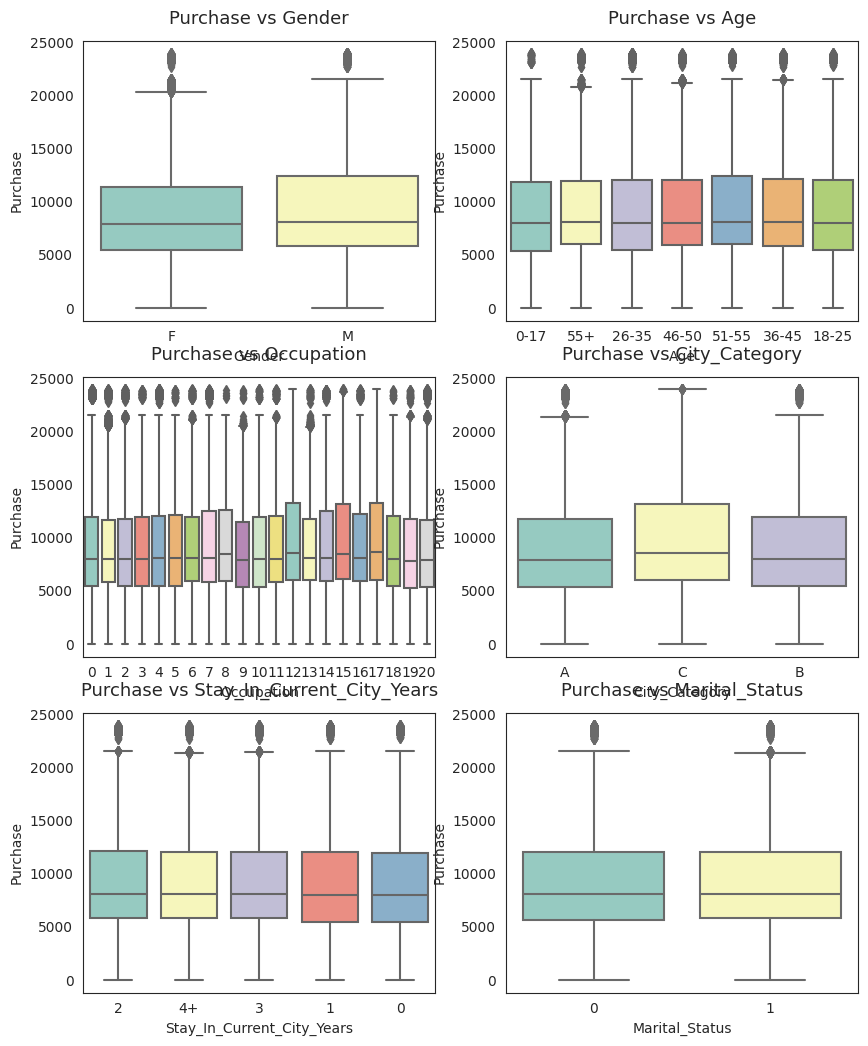

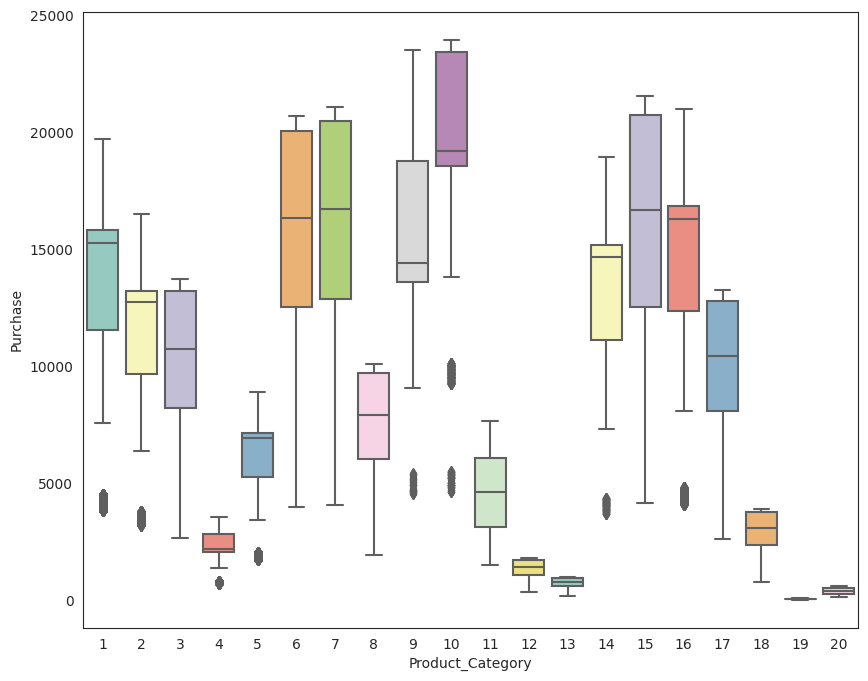

In [ ]:
# Bivariate Plots

attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
  for col in range(2):
    sns.boxplot(data=data, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
    axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
    count += 1
plt.show()
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

Observations
1. Most of the users are Male
2. There are 20 different types of Occupation and Product_Category
3. More users belong to B City_Category
4. More users are Single as compare to Married
5. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

### 2. Missing Value & Outlier Detection

In [ ]:
# Finding the missing values in the data

data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool

In [ ]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Observation - The Walmart dataset has no missing or null values

### Using the convenient pandas .quantile() function


In [ ]:
def find_outliers_IQR(data):
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  IQR=q3-q1
  outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
  return outliers

In [ ]:
outliers = find_outliers_IQR(data["Purchase"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value:"+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 2677
max outlier value:23961
min outlier value: 21401


### 4.1 Are women spending more money per transaction than men? Why or Why not?

In [ ]:
amt_data = data.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_data = amt_data.reset_index()
amt_data.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


In [ ]:
# Gender wise value counts in avg_amt_data

amt_data['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

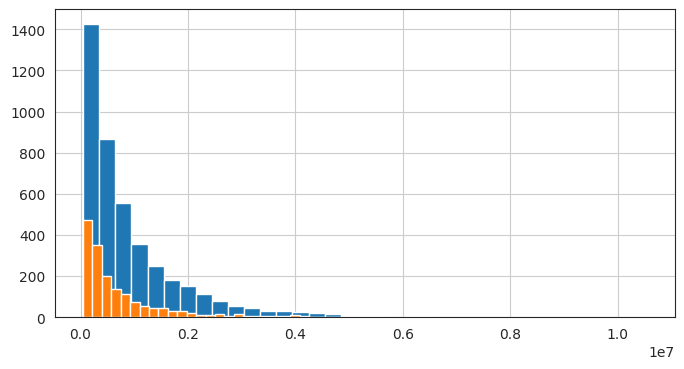

In [ ]:
# histogram of average amount spend for each customer - Male & Female

plt.figure(figsize=(8, 4))
amt_data[amt_data['Gender']=='M']['Purchase'].hist(bins=35)

amt_data[amt_data['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()


In [ ]:
male_avg = amt_data[amt_data['Gender']=='M']['Purchase'].mean()
female_avg = amt_data[amt_data['Gender']=='F']['Purchase'].mean()
print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


Observation
1. Male customers spend more money than female customers.

### 4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers

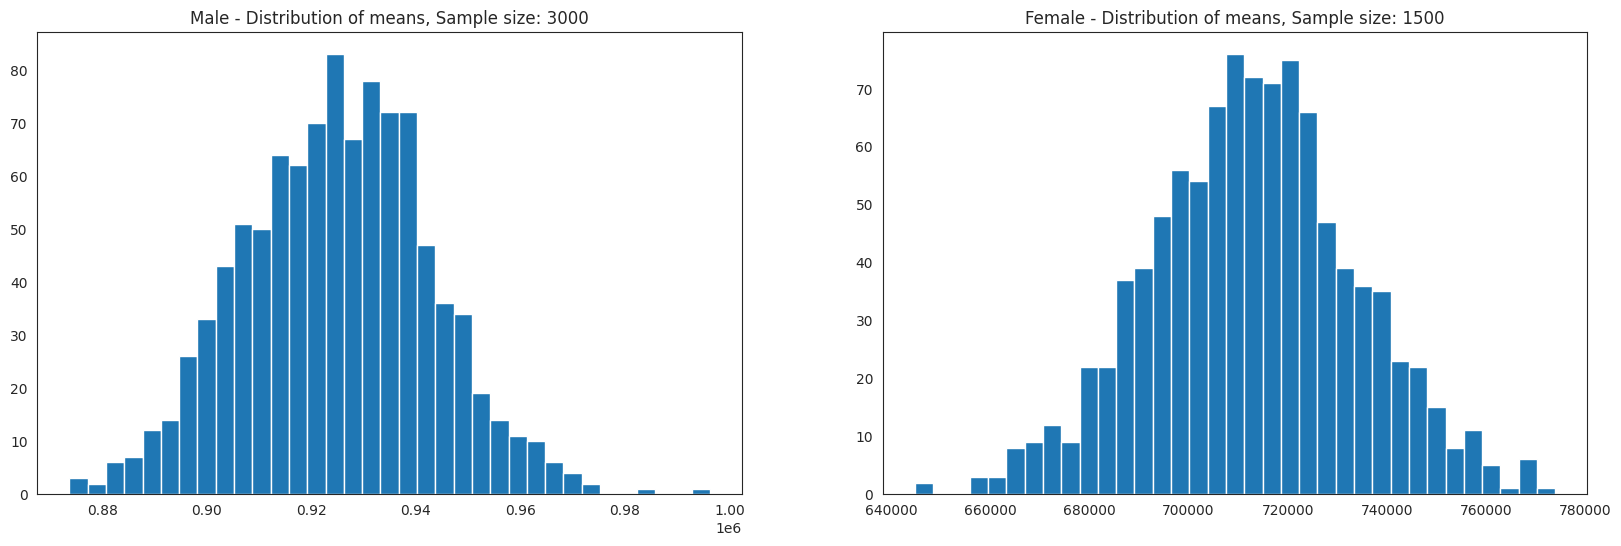

In [ ]:
male_data = amt_data[amt_data['Gender']=='M']
female_data = amt_data[amt_data['Gender']=='F']
genders = ["M", "F"]
male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000

male_means = []
female_means = []
for _ in range(num_repitions):
  male_mean = male_data.sample(male_sample_size, replace=True)['Purchase'].mean()
  female_mean = female_data.sample(female_sample_size, replace=True)['Purchase'].mean()
  male_means.append(male_mean)
  female_means.append(female_mean)
#######################################################################
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")
plt.show()

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))
print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_data['Purchase'].mean(), male_data['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_data['Purchase'].mean(), female_data['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 924841.89
Population mean - Mean of sample means of amount spend for Female: 712899.92

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


Observation
Now using the Central Limit Theorem for the population we can say that:
1. Average amount spend by male customers is 9,26,341.86
2. Average amount spend by female customers is 7,11,704.09

### 4.3 Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [ ]:
male_margin_of_error_clt = 1.96*male_data['Purchase'].std()/np.sqrt(len(male_data))
male_sample_mean = male_data['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt
female_margin_of_error_clt = 1.96*female_data['Purchase'].std()/np.sqrt(len(female_data))
female_sample_mean = female_data['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


Now we can infer about the population that, 95% of the times:
1. Average amount spend by male customer will lie in between: (895617.83, 955070.97)
2. Average amount spend by female customer will lie in between: (673254.77, 750794.02)

### 4.4 Results when the same activity is performed for Married vs Unmarried


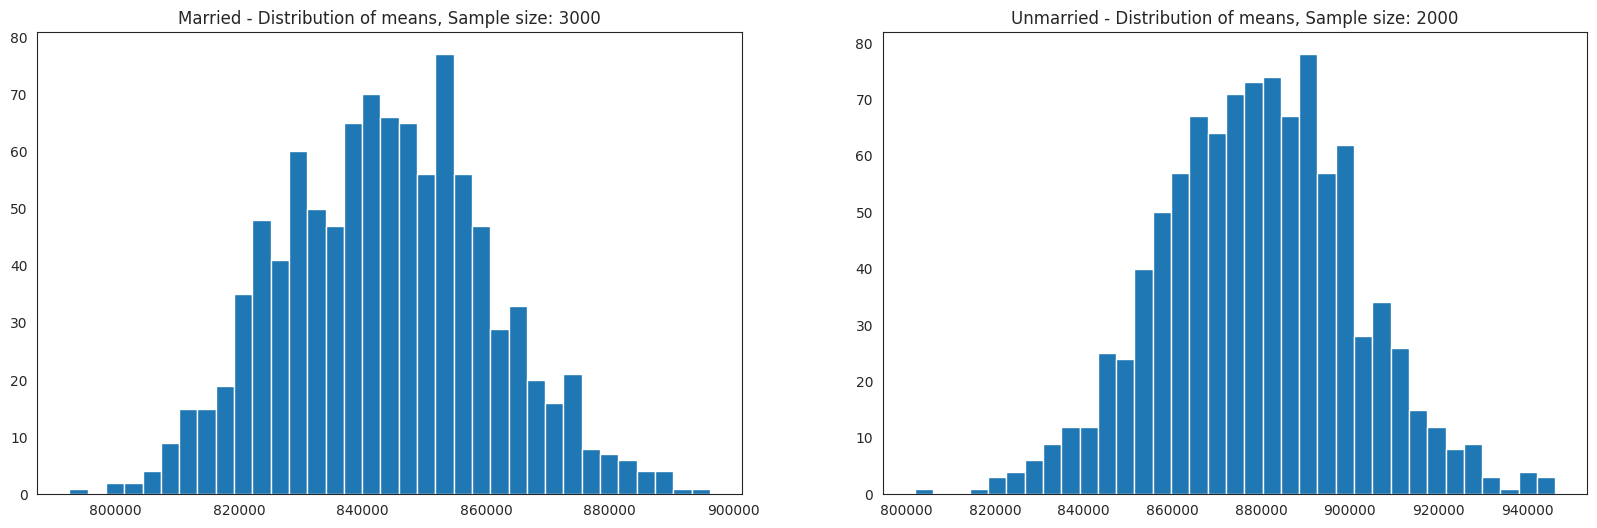

Population mean - Mean of sample means of amount spend for Married: 843716.71
Population mean - Mean of sample means of amount spend for Unmarried: 879054.10

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25
Unmarried confidence interval of means: (848741.18, 912410.38)


In [ ]:
amt_data
amt_data = data.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_data = amt_data.reset_index()
amt_data
amt_data['Marital_Status'].value_counts()
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []

unmarid_means = []
for _ in range(num_repitions):
  marid_mean = amt_data[amt_data['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
  unmarid_mean = amt_data[amt_data['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()
  marid_means.append(marid_mean)
  unmarid_means.append(unmarid_mean)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")
plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))
print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_data[amt_data['Marital_Status']==1]['Purchase'].mean(), amt_data[amt_data['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_data[amt_data['Marital_Status']==0]['Purchase'].mean(), amt_data[amt_data['Marital_Status']==0]['Purchase'].std()))
for val in ["Married", "Unmarried"]:
  new_val = 1 if val == "Married" else 0
  new_data = amt_data[amt_data['Marital_Status']==new_val]
  margin_of_error_clt = 1.96*new_data['Purchase'].std()/np.sqrt(len(new_data))
  sample_mean = new_data['Purchase'].mean()
  lower_lim = sample_mean - margin_of_error_clt
  upper_lim = sample_mean + margin_of_error_clt

print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

### 4.5 Results when the same activity is performed for Age:

In [ ]:
amt_data = data.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_data = amt_data.reset_index()
amt_data
amt_data['Age'].value_counts()
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+','0-17']
for age_interval in age_intervals:
  all_means[age_interval] = []

for age_interval in age_intervals:
  for _ in range(num_repitions):
    mean = amt_data[amt_data['Age']==age_interval].sample(sample_size,replace=True)['Purchase'].mean()
    all_means[age_interval].append(mean)

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
  new_data = amt_data[amt_data['Age']==val]
  margin_of_error_clt = 1.96*new_data['Purchase'].std()/np.sqrt(len(new_data))
  sample_mean = new_data['Purchase'].mean()
  lower_lim = sample_mean - margin_of_error_clt
  upper_lim = sample_mean + margin_of_error_clt
  print("For age {} --> confidence interval of means: ({:.2f},{:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42,1034284.21)
For age 36-45 --> confidence interval of means: (823347.80,935983.62)
For age 18-25 --> confidence interval of means: (801632.78,908093.46)
For age 46-50 --> confidence interval of means: (713505.63,871591.93)
For age 51-55 --> confidence interval of means: (692392.43,834009.42)
For age 55+ --> confidence interval of means: (476948.26,602446.23)
For age 0-17 --> confidence interval of means: (527662.46,710073.17)
